# Réseaux de Neurones Convolutifs pour la Classification d'Images

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualisation des Données Images

In [3]:
import matplotlib.pyplot as plt

In [5]:
x_train.shape

(60000, 28, 28)

In [12]:
single_image = x_train[1]

In [13]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
single_image.shape

(28, 28)

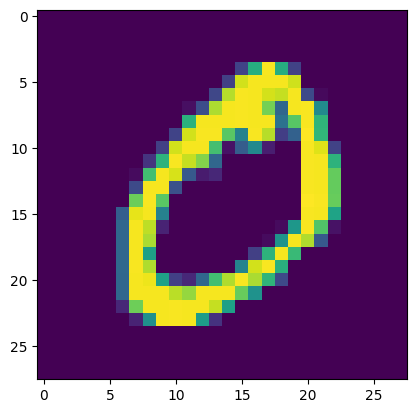

In [15]:
plt.imshow(single_image)

## Pré-traitement des données

Nous devons d'abord nous assurer que les labels (étiquettes) seront compréhensibles par notre CNN.

### Labels

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

On dirait que nos labels sont littéralement des catégories de chiffres. Nous devons traduire cela par un encodage "one hot" pour que notre CNN puisse comprendre, sinon il pensera qu'il s'agit d'une sorte de problème de régression sur un axe continu. Heureusement, Keras dispose d'une fonction facile à utiliser pour cela :

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(60000,)

In [19]:
y_example = to_categorical(y_train)

In [20]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_example.shape

(60000, 10)

In [22]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_test = to_categorical(y_test,10)

In [24]:
y_cat_train = to_categorical(y_train,10)

### Traitement des données X

Nous devrions normaliser les données X

In [25]:
single_image.max()

255

In [26]:
single_image.min()

0

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
scaled_single = x_train[0]

In [29]:
scaled_single.max()

1.0

In [30]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

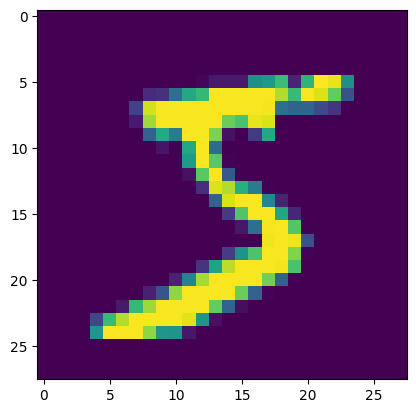

In [31]:
plt.imshow(scaled_single)

### Remodeler les Données

Actuellement, nos données sont composées de 60 000 images stockées dans une matrice de 28 x 28 pixels. 

C'est correct pour un CNN, mais nous devons ajouter une dimension supplémentaire pour montrer que nous avons affaire à un canal RGB (puisque techniquement les images sont en noir et blanc, ne montrant que des valeurs de 0 à 255 sur un seul canal), une image en couleur aurait 3 dimensions.

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
x_test.shape

(10000, 28, 28)

Remodeler pour inclure la dimension du canal (dans ce cas, 1 canal)

In [34]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [35]:
x_train.shape

(60000, 28, 28, 1)

In [36]:
x_test = x_test.reshape(10000,28,28,1)

In [37]:
x_test.shape

(10000, 28, 28, 1)

## Création du Modèle

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Images aplaties de 28 par 28 à 784 avant la couche finale
model.add(Flatten())

# 128 neurones dans une couche cachée Dense (vous pouvez changer ce nombre de neurones)
model.add(Dense(128, activation='relu'))

# La dernière couche est le calssificateur, donc 10 classes possibles
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # nous pouvons ajouter des metrics supplémentaires https://keras.io/metrics/

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Entraînement du Modèle

In [43]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10


1875/1875 [==============================] - 28s 14ms/step - loss: 0.1344 - accuracy: 0.9602 - val_loss: 0.0458 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0410 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0459 - val_accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0413 - val_accuracy: 0.9864


## Évaluation du Modèle

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
losses = pd.DataFrame(model.history.history)

In [46]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.134394,0.960183,0.045838,0.9863
1,0.044781,0.986183,0.041035,0.9862
2,0.029893,0.990583,0.038930,0.9873
3,0.019998,0.993467,0.045927,0.9859
4,0.013791,0.995833,0.041319,0.9864


<Axes: >

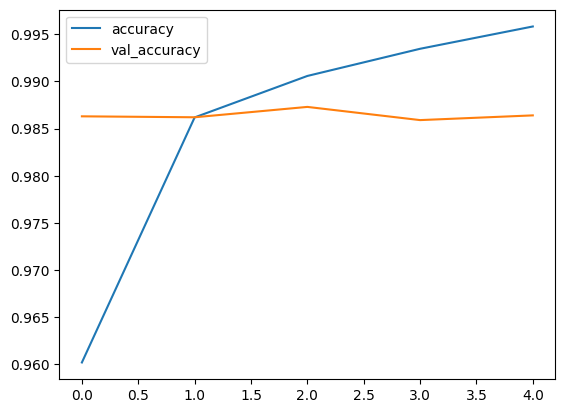

In [47]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

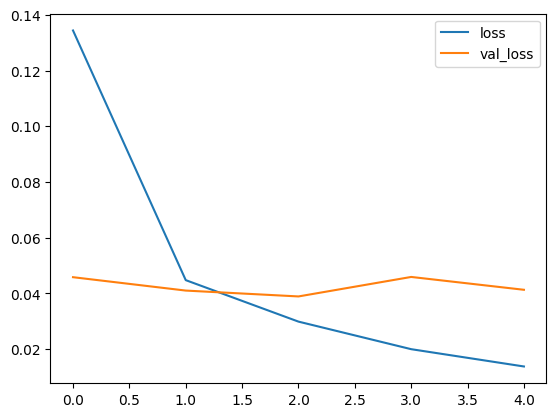

In [48]:
losses[['loss','val_loss']].plot()

In [49]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.041318852454423904, 0.9864000082015991]


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 4ms/step


In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [54]:
predictions[0]

7

In [55]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1127,    1,    0,    0,    1,    2,    3,    1,    0],
       [   2,    2, 1017,    0,    1,    0,    2,    6,    2,    0],
       [   1,    0,    4,  993,    0,    5,    0,    3,    3,    1],
       [   1,    0,    0,    0,  974,    0,    2,    0,    0,    5],
       [   2,    0,    0,    2,    0,  886,    2,    0,    0,    0],
       [   5,    2,    0,    0,    2,    5,  943,    0,    1,    0],
       [   0,    0,    2,    2,    0,    1,    0, 1019,    1,    3],
       [   4,    0,    4,    0,    1,    2,    2,    2,  956,    3],
       [   3,    2,    0,    1,   13,   11,    0,    5,    2,  972]],
      dtype=int64)

In [58]:
import seaborn as sns

<Axes: >

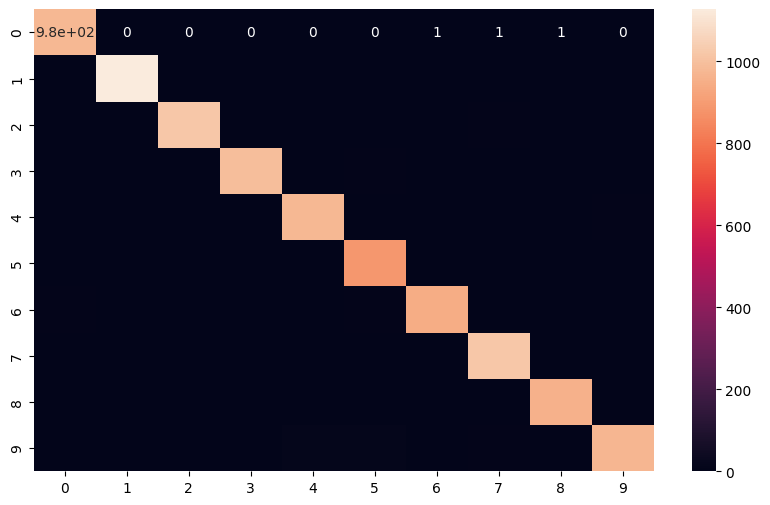

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


### Prédiction d'une image donnée

In [60]:
my_number = x_test[0]

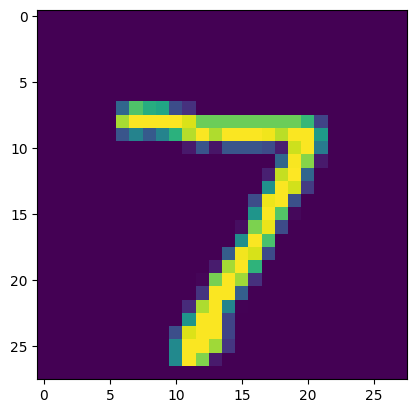

In [61]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)